In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt   
import folium 
import seaborn as sns 
plt.style.use('seaborn')
import plotly.express as px
import scipy.stats as stats

import statsmodels.api as sm
import statsmodels.formula.api as ols
import statsmodels.stats.api as sms

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score

-This Notebooks refines the model further and takes into account my target audiance. I am predicting house prices for the average home buyer in King County.
 The average house price is 5400,000 dollars and I will be removing all rows that fall outside of 2 standard diviation of that number. 

In [36]:
df_house = pd.read_csv('kc_house_data.csv')


In [37]:
# Average house price
df_house['price'].mean()

540088.1417665294

In [38]:
df_house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [40]:
#remove outliers outside of 2 standard diviations
z_scores_price = stats.zscore(df_house.price)
abs_z_scores_price = np.abs(z_scores_price)
filtered_entries_price = (abs_z_scores_price < 2)
df_house_2std_price = df_house[filtered_entries_price]

In [41]:
df_house_2std_price

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [42]:
df_house_2std_price.price.mean()

487529.024939817

In [13]:
#unique bedrooms

In [43]:
#Droping Bedroom outliers, house with 33, 11 ,10 ,9, 8 , and 0 bedrooms 

df_house_2std_price.drop(df_house_2std_price.loc[df_house_2std_price['bedrooms'] == 33 ].index, inplace=True)
df_house_2std_price.drop(df_house_2std_price.loc[df_house_2std_price['bedrooms'] == 11 ].index, inplace=True)
df_house_2std_price.drop(df_house_2std_price.loc[df_house_2std_price['bedrooms'] == 10 ].index, inplace=True)
df_house_2std_price.drop(df_house_2std_price.loc[df_house_2std_price['bedrooms'] == 9 ].index, inplace=True)
df_house_2std_price.drop(df_house_2std_price.loc[df_house_2std_price['bedrooms'] == 8 ].index, inplace=True)
df_house_2std_price.drop(df_house_2std_price.loc[df_house_2std_price['bedrooms'] == 0 ].index, inplace=True)

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:4117: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [44]:
df_house_2std_price.bedrooms.value_counts()

3    9666
4    6469
2    2744
5    1392
6     238
1     199
7      32
Name: bedrooms, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe676236080>,
      dtype=object)

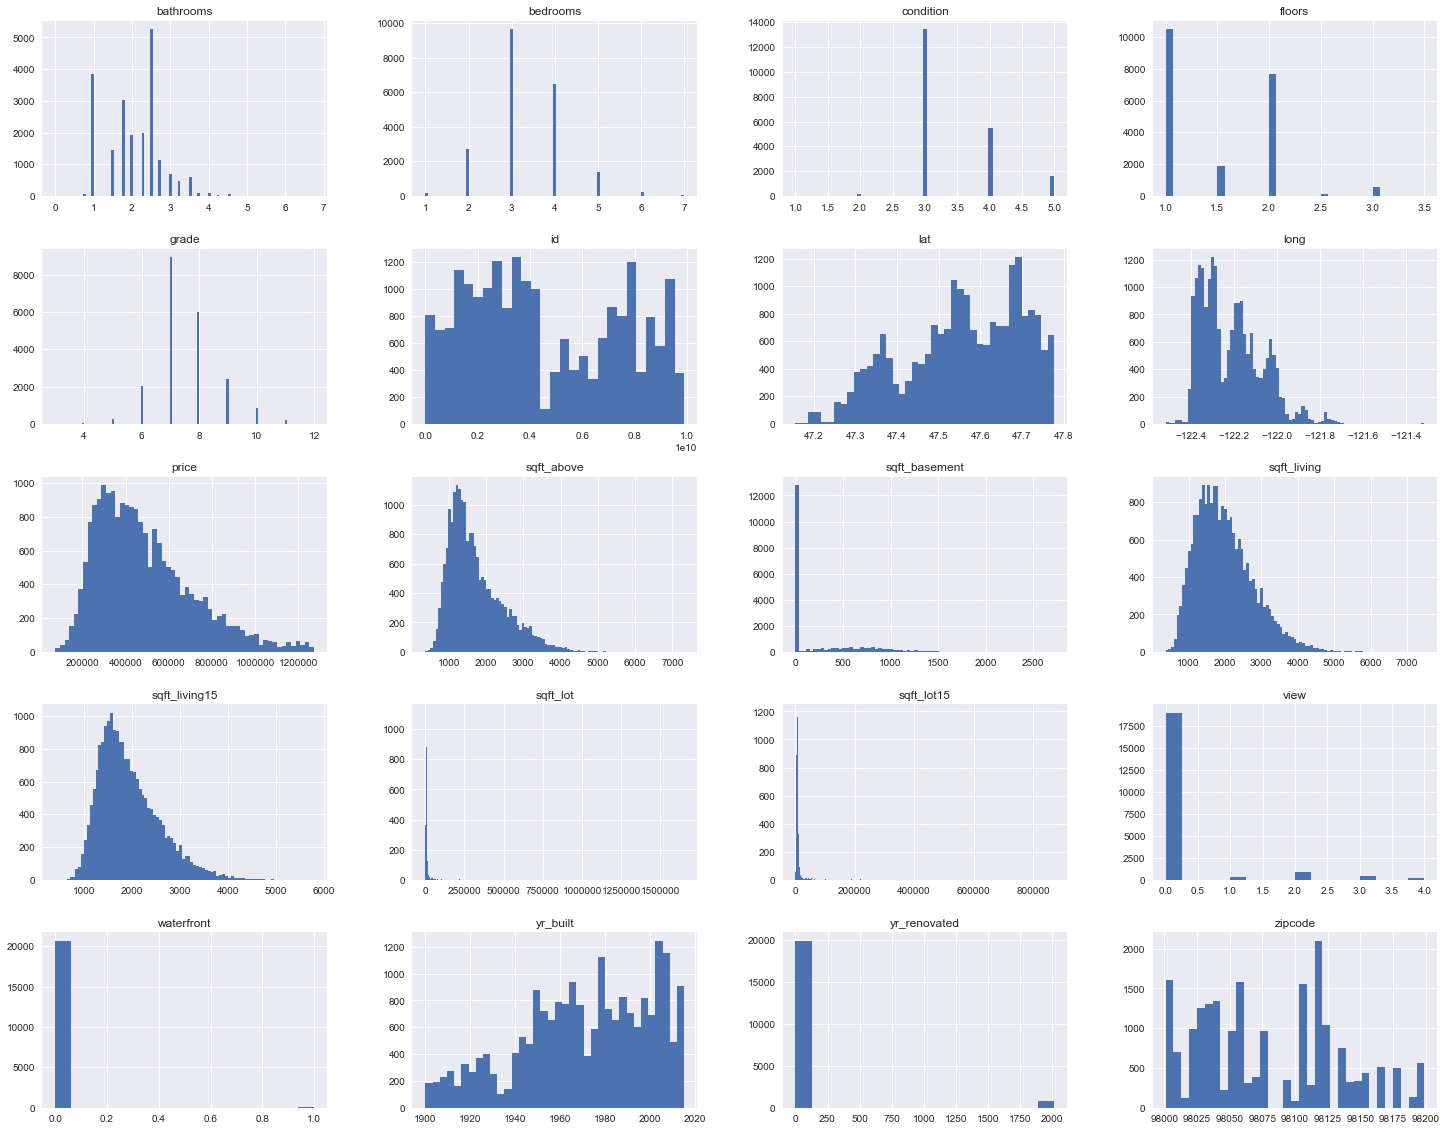

In [45]:
df_house_2std_price.hist(figsize=(25,20), bins='auto')

In [47]:
df_house_2std_price.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.001529,0.007969,0.018728,0.000960,-0.133716,0.026283,0.003613,0.020573,-0.024382,0.025266,0.002928,-0.003409,0.024372,-0.018488,-0.004841,0.000892,0.020000,0.006770,-0.142748
price,0.001529,1.000000,0.311686,0.469975,0.639841,0.092601,0.277917,0.069364,0.269297,0.035631,0.649226,0.546450,0.250238,0.062044,0.092052,-0.023456,0.415188,0.065978,0.580447,0.082931
bedrooms,0.007969,0.311686,1.000000,0.510786,0.603366,0.029788,0.166079,-0.036643,0.047100,0.022611,0.345059,0.485145,0.290118,0.173385,0.003944,-0.157354,-0.029573,0.149039,0.394347,0.027249
bathrooms,0.018728,0.469975,0.510786,1.000000,0.723443,0.069631,0.504122,-0.003828,0.109009,-0.136975,0.625232,0.646825,0.230904,0.541410,0.027971,-0.206904,-0.001771,0.248101,0.537828,0.070020
sqft_living,0.000960,0.639841,0.603366,0.723443,1.000000,0.162848,0.344164,0.002526,0.187260,-0.073553,0.719541,0.857731,0.384467,0.352056,0.023672,-0.203927,0.020745,0.283360,0.744942,0.175679
sqft_lot,-0.133716,0.092601,0.029788,0.069631,0.162848,1.000000,-0.015553,0.024241,0.073104,-0.004102,0.097150,0.167583,0.012504,0.044625,0.010463,-0.130257,-0.093265,0.224322,0.143275,0.710867
floors,0.026283,0.277917,0.166079,0.504122,0.344164,-0.015553,1.000000,-0.000872,-0.007433,-0.274729,0.457879,0.528891,-0.287307,0.507061,0.000196,-0.063839,0.039494,0.133963,0.270709,-0.019934
waterfront,0.003613,0.069364,-0.036643,-0.003828,0.002526,0.024241,-0.000872,1.000000,0.306402,0.014817,-0.008723,-0.005830,0.015331,-0.041775,0.077372,0.045996,-0.042101,-0.058529,0.010653,0.031644
view,0.020573,0.269297,0.047100,0.109009,0.187260,0.073104,-0.007433,0.306402,1.000000,0.035353,0.152871,0.081371,0.214295,-0.065382,0.075849,0.098552,-0.020567,-0.076004,0.205401,0.070695
condition,-0.024382,0.035631,0.022611,-0.136975,-0.073553,-0.004102,-0.274729,0.014817,0.035353,1.000000,-0.167488,-0.177011,0.176284,-0.355753,-0.059081,-0.003796,-0.017814,-0.102000,-0.115807,0.000441


In [48]:
df_house_2std_price.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [49]:
neededCols_2std_price = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
            'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
            'sqft_living15', 'sqft_lot15']

regression_data_2std_price = df_house_2std_price[neededCols_2std_price]

In [72]:
#regression model with price and beedroom outliers removed
#only needed columns, location data removed

X = df_house_2std_price.drop(['price'], axis=1)
y = df_house_2std_price['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)


linreg = LinearRegression()
lm = sm.OLS(y_train, X_train)

model_2std_price = lm.fit()
model_2std_price.summary()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [59]:
print('MSE for train set:', np.sqrt(mean_squared_error(y_train, model_2std_price.predict(X_train))))
print('MSE for test set:', np.sqrt(mean_squared_error(y_test, model_2std_price.predict(X_test))))
print('MSE difference:', np.sqrt(mean_squared_error(y_train, model_2std_price.predict(X_train))) - np.sqrt(mean_squared_error(y_test, model_2std_price.predict(X_test))))
print('Cross Validation Train Set:', cross_val_score(linreg, X_train, y_train, cv = 10, scoring = 'r2').mean())
print('Cross Validation Test Set:', cross_val_score(linreg, X_test, y_test, cv = 10, scoring = 'r2').mean())

MSE for train set: 150451.61004742092
MSE for test set: 153020.44414043013
MSE difference: -2568.834093009209
Cross Validation Train Set: 0.6010755563177417
Cross Validation Test Set: 0.6078282493687135


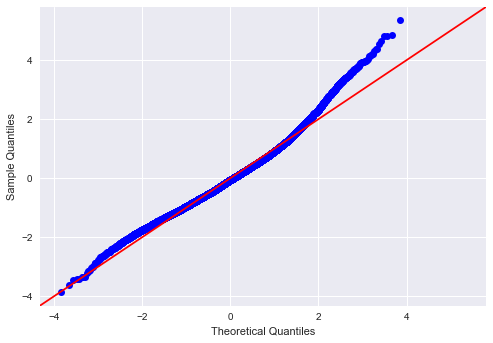

In [56]:
fig = sm.graphics.qqplot(model_2std_price.resid, dist=stats.norm, line='45', fit=True)

In [58]:
df_house_2std_price.to_csv('Housing_Outliers_removed.csv')

In [61]:
df_colin = pd.read_csv('Housing_Outliers_removed.csv')

In [62]:
#Checking for Colinarity 
co_lin = df_colin.corr().abs().stack().reset_index().sort_values(0, ascending=False)

co_lin['pairs'] = list(zip(co_lin.level_0, co_lin.level_1))

co_lin.set_index(['pairs'], inplace = True)

co_lin.drop(columns=['level_1', 'level_0'], inplace = True)

# cc for correlation coefficient
co_lin.columns = ['cc']

co_lin.drop_duplicates(inplace=True)

co_lin[(co_lin.cc>.7) & (co_lin.cc<1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.857731
"(sqft_living, sqft_living15)",0.744942
"(sqft_living, bathrooms)",0.723443
"(sqft_above, sqft_living15)",0.722329
"(sqft_above, grade)",0.720057
"(grade, sqft_living)",0.719541
"(sqft_lot15, sqft_lot)",0.710867


In [64]:
#droping additional coliniar columns 
df_colin.drop(columns=['sqft_above', 'sqft_lot15', 'sqft_lot', 'sqft_living15'], inplace=True)

In [66]:
df_colin.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long'],
      dtype='object')

In [65]:
from itertools import combinations

interactions = []

feat_combinations = combinations(X.columns, 2)

data = X.copy()
for i, (a, b) in enumerate(feat_combinations):
    data['interaction'] = data[a] * data[b]
    score = np.mean(cross_val_score(regression, data, y, scoring='r2', cv=crossvalidation))
    if score > baseline:
        interactions.append((a, b, round(score,3)))
    
    if i % 50 == 0:
        print(i)
            
print('Top 5 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:5])

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,floors,waterfront,view,condition,grade,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,0,7129300520,20141013T000000,221900.0,3,1.00,1180,1.0,0,0,3,7,0,1955,0,98178,47.5112,-122.257
1,1,6414100192,20141209T000000,538000.0,3,2.25,2570,2.0,0,0,3,7,400,1951,1991,98125,47.7210,-122.319
2,2,5631500400,20150225T000000,180000.0,2,1.00,770,1.0,0,0,3,6,0,1933,0,98028,47.7379,-122.233
3,3,2487200875,20141209T000000,604000.0,4,3.00,1960,1.0,0,0,5,7,910,1965,0,98136,47.5208,-122.393
4,4,1954400510,20150218T000000,510000.0,3,2.00,1680,1.0,0,0,3,8,0,1987,0,98074,47.6168,-122.045
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20735,21608,263000018,20140521T000000,360000.0,3,2.50,1530,3.0,0,0,3,8,0,2009,0,98103,47.6993,-122.346
20736,21609,6600060120,20150223T000000,400000.0,4,2.50,2310,2.0,0,0,3,8,0,2014,0,98146,47.5107,-122.362
20737,21610,1523300141,20140623T000000,402101.0,2,0.75,1020,2.0,0,0,3,7,0,2009,0,98144,47.5944,-122.299
20738,21611,291310100,20150116T000000,400000.0,3,2.50,1600,2.0,0,0,3,8,0,2004,0,98027,47.5345,-122.069


In [30]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [31]:
result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



Add  sqft_living                    with p-value 0.0
Add  grade                          with p-value 0.0
Add  yr_built                       with p-value 0.0
Add  view                           with p-value 2.12091e-105
Add  floors                         with p-value 1.61936e-85
Add  sqft_living15                  with p-value 2.36717e-82
Add  sqft_basement                  with p-value 2.47112e-41
Add  condition                      with p-value 4.20957e-30
Add  bathrooms                      with p-value 1.1893e-23
Add  bedrooms                       with p-value 1.28219e-30
Add  sqft_above                     with p-value 8.19813e-07
Add  sqft_lot15                     with p-value 6.65499e-05
Add  sqft_lot                       with p-value 0.00110123
resulting features:
['sqft_living', 'grade', 'yr_built', 'view', 'floors', 'sqft_living15', 'sqft_basement', 'condition', 'bathrooms', 'bedrooms', 'sqft_above', 'sqft_lot15', 'sqft_lot']


In [32]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

/Users/andrewbanner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning:

Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.603
Method:                 Least Squares   F-statistic:                     2629.
Date:                Mon, 23 Nov 2020   Prob (F-statistic):               0.00
Time:                        15:57:29   Log-Likelihood:            -2.7536e+05
No. Observations:               20740   AIC:                         5.508e+05
Df Residuals:                   20727   BIC:                         5.509e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4.871e+06   8.96e+04     54.389      0.000     4.7e+06    5.05e+06
sqft_living      50.7101      1.775     28.567      0.000      47.231      54.190
grade          9.655e+04   1542.553     62.589      0.000    9.35e+04    9.96e+04
yr_built      -2793.4449     46.233    -60.421      0.000   -2884.065   -2702.825
view            2.75e+04   1552.434     17.715      0.000    2.45e+04    3.05e+04
floors         5.559e+04   2572.731     21.607      0.000    5.05e+04    6.06e+04
sqft_living15    58.4522      2.564     22.795      0.000      53.426      63.478
sqft_basement    41.9062      1.952     21.468      0.000      38.080      45.732
condition      1.893e+04   1649.117     11.481      0.000    1.57e+04    2.22e+04
bathrooms      2.845e+04   2385.237     11.928      0.000    2.38e+04    3.31e+04
bedrooms      -1.725e+04   1466.736    -11.760      0.000   -2.01e+04   -1.44e+04
sqft_above        8.8039      1.684      5.228      0.000       5.503      12.104
sqft_lot15       -0.2733      0.053     -5.138      0.000      -0.378      -0.169
sqft_lot          0.1141      0.035      3.264      0.001       0.046       0.183
==============================================================================
Omnibus:                     1315.267   Durbin-Watson:                   1.968
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2208.257
Skew:                           0.500   Prob(JB):                         0.00
Kurtosis:                       4.248   Cond. No.                     3.40e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.3e-22. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""